# Loading Dataset using Kaggle API (~ 30 sec)

In [1]:
# !gdown https://raw.githubusercontent.com/Ishaanshri95/kinda_fruity_brr/main/kaggle.json
# !mkdir -p ~/.kaggle
# !cp /content/kaggle.json ~/.kaggle/kaggle.json
# !chmod 600 /root/.kaggle/kaggle.json
# !kaggle datasets download -d moltean/fruits
# ![[ ! -d /content/fruits360 ]] && unzip fruits.zip -d /content/fruits360/ &> /dev/null
# !rm -r fruits360/fruits-360-original-size/ &> /dev/null
# !rm fruits.zip &> /dev/null
# # tanmay kulkarni anand mishra m4c 100% working best number 1 punjabi fruits dataset 144p 99.9 test accuracy working yes

In [2]:

!gdown https://raw.githubusercontent.com/Ishaanshri95/kinda_fruity_brr/main/kaggle.json


Downloading...
From: https://raw.githubusercontent.com/Ishaanshri95/kinda_fruity_brr/main/kaggle.json
To: /content/kaggle.json
 78% 68.0/87.0 [00:00<00:00, 113kB/s]


In [3]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [4]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d moltean/fruits

 99% 1.28G/1.28G [00:43<00:00, 75.8MB/s]
100% 1.28G/1.28G [00:43<00:00, 31.6MB/s]


In [5]:
![[ ! -d /content/fruits360 ]] && unzip fruits.zip -d /content/fruits360/ &> /dev/null
!rm -r fruits360/fruits-360-original-size/ &> /dev/null
!rm fruits.zip &> /dev/null

# Necessary imports, initializations

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
from tqdm import tqdm

import PIL 

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from PIL import Image
from os import listdir
from os.path import isfile, join
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
import cv2
import time
import bz2
import pickle
from warnings import filterwarnings
filterwarnings("ignore")

### Defining folder (class) names

In [7]:
folders = ["Apple Braeburn", "Apple Crimson Snow", "Apple Golden 1", "Apple Golden 2", "Apple Golden 3", "Apple Granny Smith", "Apple Pink Lady", "Apple Red 1", "Apple Red 2"
, "Apple Red 3",'Apple Red Delicious','Apple Red Yellow 1','Apple Red Yellow 2','Apricot','Avocado','Avocado ripe','Banana','Banana Lady Finger','Banana Red','Beetroot'
,'Blueberry','Cactus fruit','Cantaloupe 1','Cantaloupe 2','Carambula','Cauliflower','Cherry 1','Cherry 2','Cherry Rainier','Cherry Wax Black','Cherry Wax Red'
,'Cherry Wax Yellow','Chestnut','Clementine','Cocos','Corn','Corn Husk','Cucumber Ripe','Cucumber Ripe 2','Dates','Eggplant','Fig','Ginger Root','Granadilla','Grape Blue'
,'Grape Pink','Grape White','Grape White 2','Grape White 3','Grape White 4','Grapefruit Pink','Grapefruit White','Guava','Hazelnut','Huckleberry','Kaki','Kiwi','Kohlrabi'
,'Kumquats','Lemon','Lemon Meyer','Limes','Lychee','Mandarine','Mango','Mango Red','Mangostan','Maracuja','Melon Piel de Sapo','Mulberry','Nectarine','Nectarine Flat'
,'Nut Forest','Nut Pecan','Onion Red','Onion Red Peeled','Onion White','Orange','Papaya','Passion Fruit','Peach','Peach 2','Peach Flat','Pear','Pear 2','Pear Abate','Pear Forelle'
,'Pear Kaiser','Pear Monster','Pear Red','Pear Stone','Pear Williams','Pepino','Pepper Green','Pepper Orange','Pepper Red','Pepper Yellow','Physalis','Physalis with Husk'
,'Pineapple','Pineapple Mini','Pitahaya Red','Plum','Plum 2','Plum 3','Pomegranate','Pomelo Sweetie','Potato Red','Potato Red Washed','Potato Sweet','Potato White'
,'Quince','Rambutan','Raspberry','Redcurrant','Salak','Strawberry','Strawberry Wedge','Tamarillo','Tangelo','Tomato 1','Tomato 2','Tomato 3','Tomato 4','Tomato Cherry Red'
,'Tomato Heart','Tomato Maroon',"Tomato not Ripened","Tomato Yellow","Walnut","Watermelon"]

### Declaring data directories for Training and Testing data

In [8]:
data_dir = '/content/fruits360/fruits-360_dataset/fruits-360/Training'
val_dir  = '/content/fruits360/fruits-360_dataset/fruits-360/Test'
# print(os.listdir(data_dir))
# classes = os.listdir(data_dir + '/Training')
# print(classes)

# KNN and Random Forest

### Loading data into numpy array (~ 30 sec)

In [9]:
image_dimensions = (30, 30)

def dataloader_numpy(path):
  data = []
  labels = []
  for folder in tqdm(os.listdir(path)):
    folderpath = path + '/' + folder
    for image in os.listdir(folderpath):
      imagepath = folderpath + '/' + image
      img = PIL.Image.open(imagepath).convert('RGB').resize(image_dimensions)
      # asarray() class is used to convert
      # PIL images into NumPy arrays
      numpydata = np.asarray(img).flatten()
      data.append(numpydata)
      labels.append(folders.index(folder))
  return data, labels

data, labels = dataloader_numpy(data_dir)
data_test, labels_test = dataloader_numpy(val_dir)
data   = np.array(data)
data_test   = np.array(data_test)
labels = np.matrix(labels).T
labels_test = np.matrix(labels_test).T
data = np.asarray(np.concatenate([data,labels], axis = 1))
data_test = np.asarray(np.concatenate([data_test,labels_test], axis = 1))
data

100%|██████████| 131/131 [00:14<00:00,  8.84it/s]


array([[255, 255, 255, ..., 255, 255,  35],
       [255, 255, 255, ..., 255, 255,  35],
       [255, 255, 255, ..., 255, 255,  35],
       ...,
       [255, 255, 255, ..., 255, 255, 122],
       [255, 255, 255, ..., 255, 255, 122],
       [255, 255, 255, ..., 255, 255, 122]])

### Train-Validation Split

In [10]:
train, val = train_test_split(data, test_size = 0.3, random_state = 42, stratify = data[:,-1])
print("Number of unique classes in training set:", len(np.unique(train[:,-1])))
print("Number of unique classes in validation set:", len(np.unique(val[:,-1])))

Number of unique classes in training set: 131
Number of unique classes in validation set: 131


### Dimensionality Reduction using PCA (~ 4 min)

In [ ]:
pca = PCA()
pca.fit(train[:,:-1])
pca.explained_variance_ratio_

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_[:100]), "k*-")
plt.xlabel("Number of Principal Components chosen")
plt.ylabel("Explained Variance Ratio")
plt.show()

The first 100 principal components are able to explain > 90% variance of the data.

In [ ]:
trainX_pca = pca.transform(train[:,:-1])

## Training the Models 

### KNeighboursClassifier (KNN) (~ 3 min)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train[:,:-1], train[:,-1])
pred = knn.predict(val[:,:-1])
print("Accuracy on the validation dataset:", str(np.around(accuracy_score(val[:,-1], pred)*100, decimals = 2)) + "%")

### KNN on PCA transformed dataset (~ 8 min)

* Finding the number of best Principal Components to choose

In [ ]:
acc_train = []
acc_val = []

n_list = range(10,101,10)

for n in tqdm(n_list):
  trainX_pca_ = trainX_pca[:,:n]

  knn = KNeighborsClassifier(n_neighbors = 3)
  knn.fit(trainX_pca_, train[:,-1])
  pred = knn.predict(pca.transform(val[:,:-1])[:,:n])
  acc_val.append(accuracy_score(val[:,-1], pred)*100)

  pred = knn.predict(trainX_pca_)
  acc_train.append(accuracy_score(train[:,-1], pred)*100)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(n_list, acc_train, "r*-", label="Train Accuracy")
plt.plot(n_list, acc_val, "b*-", label="Validation Accuracy")
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy (%)")
plt.title("PCA Results")
plt.legend()
plt.show()

In [ ]:
n_components = 40 # Using the above graph we select these many best Principal Components 


In [ ]:
trainX_pca_ = trainX_pca[:,:n_components]

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(trainX_pca_, train[:,-1])
pred = knn.predict(pca.transform(val[:,:-1])[:,:n_components])
print("Accuracy on the validation dataset:", str(np.around(accuracy_score(val[:,-1], pred)*100, decimals = 2)) + "%")

We can see that after applying PCA, the change in accuracy is negligible. However, the number of dimensions has reduced drastically.

### RandomForestClassifier (~ 7 min)

#### Training the base model (~ 1 min)

In [ ]:
rfc = RFC(max_depth = 10, random_state = 42, verbose = 3, n_jobs = -1)
rfc.fit(train[:,:-1], train[:,-1])
pred = rfc.predict(val[:,:-1])
time.sleep(2)
clear_output(wait = True)
print("Accuracy on the validation dataset:", str(np.around(accuracy_score(val[:,-1], pred)*100, decimals = 2)) + "%")

#### Tuning the `max_depth` of RFC (~ 4 min)

In [ ]:
acc_train = []
acc_val = []

md_list = range(2,41,2)

for md in tqdm(md_list):
  rfc = RFC(n_estimators = 10, max_depth = md, random_state = 42, n_jobs = -1)     # Using low value of n_estimators to speed up the tuning process
  rfc.fit(train[:,:-1], train[:,-1])
  pred = rfc.predict(val[:,:-1])
  acc_val.append(accuracy_score(val[:,-1], pred)*100)

  pred = rfc.predict(train[:,:-1])
  acc_train.append(accuracy_score(train[:,-1], pred)*100)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(md_list, acc_train, "r*-", label="Train Accuracy")
plt.plot(md_list, acc_val, "b*-", label="Validation Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy (%)")
plt.title("RFC Results")
plt.legend()
plt.show()

After tuning the `max_depth` for RFC, best value is found to be 20.

#### Model with best `max_depth` (~ 2 min)

In [ ]:
rfc = RFC(max_depth = 20, random_state = 42, verbose = 3, n_jobs = -1)
rfc.fit(train[:,:-1], train[:,-1])
pred = rfc.predict(val[:,:-1])
time.sleep(2)
clear_output(wait = True)
print("Accuracy on the validation dataset:", str(np.around(accuracy_score(val[:,-1], pred)*100, decimals = 2)) + "%")

### RFC on PCA transformed dataset (~ 4 min)

#### Finding the number of best Principal Components to choose

In [ ]:
acc_train = []
acc_val = []

n_list = range(10,101,10)

for n in tqdm(n_list):
  trainX_pca_ = trainX_pca[:,:n]

  rfc = RFC(n_estimators = 10, max_depth = 20, random_state = 42, n_jobs = -1)     # Using low value of n_estimators to speed up the tuning process
  rfc.fit(trainX_pca_, train[:,-1])
  pred = rfc.predict(pca.transform(val[:,:-1])[:,:n])
  acc_val.append(accuracy_score(val[:,-1], pred)*100)

  pred = rfc.predict(trainX_pca_)
  acc_train.append(accuracy_score(train[:,-1], pred)*100)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(n_list, acc_train, "r*-", label="Train Accuracy")
plt.plot(n_list, acc_val, "b*-", label="Validation Accuracy")
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy (%)")
plt.title("PCA Results")
plt.legend()
plt.show()

In [ ]:
n_components = 20 # Using the above graph we select these many best Principal Components 

In [ ]:
trainX_pca_ = trainX_pca[:,:n_components]

rfc = RFC(max_depth = 20, random_state = 42, n_jobs = -1)
rfc.fit(trainX_pca_, train[:,-1])
pred = rfc.predict(pca.transform(val[:,:-1])[:,:n_components])
print("Accuracy on the validation dataset:", str(np.around(accuracy_score(val[:,-1], pred)*100, decimals = 2)) + "%")

We can see that after applying PCA, the change in accuracy is negligible. However, the number of dimensions has reduced drastically.

## Evaluating on the Test Dataset

### KNN without PCA (~ 20 min)

In [11]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(data[:,:-1], data[:,-1])
pred = knn.predict(data_test[:,:-1])
pred2 = knn.predict(data[:,:-1])
print("Accuracy on the train dataset:", str(np.around(accuracy_score(data[:,-1], pred2)*100, decimals = 2)) + "%")
print("Accuracy on the test dataset:", str(np.around(accuracy_score(data_test[:,-1], pred)*100, decimals = 2)) + "%")

Accuracy on the train dataset: 99.98%
Accuracy on the test dataset: 90.83%


### KNN with PCA (~ 3 min)

In [26]:
pca = PCA(n_components = 40)  # Using value obtained earlier
knn.fit(pca.fit_transform(data[:,:-1]), data[:,-1])
TESTX_pca = pca.transform(data_test[:,:-1])
pred = knn.predict(TESTX_pca)
pred2 = knn.predict(pca.transform(data[:,:-1]))
print("Accuracy on the train dataset:", str(np.around(accuracy_score(data[:,-1], pred2)*100, decimals = 2)) + "%")
print("Accuracy on the test dataset:", str(np.around(accuracy_score(data_test[:,-1], pred)*100, decimals = 2)) + "%")

Accuracy on the train dataset: 99.98%
Accuracy on the test dataset: 91.41%


KNN on the PCA transformed data consistently performs better than KNN on the original dataset, although only by a small margin.

### RFC without PCA (~ 3 min)

In [25]:
rfc = RFC(max_depth = 20, random_state = 42, verbose = 3, n_jobs = -1)
rfc.fit(data[:,:-1], data[:,-1])
pred = rfc.predict(data_test[:,:-1])
pred2 = rfc.predict(data[:,:-1])
time.sleep(2)
clear_output(wait = True)
print("Accuracy on the train dataset:", str(np.around(accuracy_score(data[:,-1], pred2)*100, decimals = 2)) + "%")
print("Accuracy on the test dataset:", str(np.around(accuracy_score(data_test[:,-1], pred)*100, decimals = 2)) + "%")

Accuracy on the train dataset: 100.0%
Accuracy on the test dataset: 94.46%


### RFC with PCA (~ 2 min)

In [14]:
n_components = 20 # Value obtained earlier for RFC

rfc2 = RFC(max_depth = 20, random_state = 42, verbose = 3, n_jobs = -1)
rfc2.fit(pca.transform(data[:,:-1])[:,:n_components], data[:,-1]) # Using the same PCA model fomr KNN, but this we take different number of best Principal Components
pred = rfc2.predict(TESTX_pca[:,:n_components])
pred2 = rfc2.predict(pca.transform(data[:,:-1])[:,:n_components])
time.sleep(2)
clear_output(wait = True)
print("Accuracy on the train dataset:", str(np.around(accuracy_score(data[:,-1], pred2)*100, decimals = 2)) + "%")
print("Accuracy on the test dataset:", str(np.around(accuracy_score(data_test[:,-1], pred)*100, decimals = 2)) + "%")

Accuracy on the train dataset: 99.99%
Accuracy on the test dataset: 88.83%


# Convolutional Neural Networks

## Setting image sizes, batch sizes for keras models

In [18]:
img_height, img_width= 192, 192
batch_size= 128

## Loading data for keras models

### Training

In [19]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
# validation_split=0.2,
# subset="training",
seed=123,
label_mode='categorical',
image_size=(img_height, img_width),
batch_size=batch_size
)

Found 67692 files belonging to 131 classes.


### Testing

In [20]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
val_dir,
# validation_split=0.1,
# subset="validation",
seed=123,
label_mode="categorical",
image_size=(img_height, img_width),
batch_size=batch_size)

Found 22688 files belonging to 131 classes.


In [21]:
class_names = train_ds.class_names

## Fine-Tuning approach with VGG16
VGG 16 was proposed by Karen Simonyan and Andrew Zisserman of the Visual Geometry Group Lab of Oxford University in 2014 in the paper “VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION”. This model won the 1st  and 2nd place on the above categories in 2014 ILSVRC challenge. We will now fine tune this model for our classification task.

### Transfer learning with VGG16 as base model trained on imagenet - **97.7%**
The basis of transfer learning is to employ a parent model trained on a large dataset and by freezing the weights of the backbone and adding new fully connected layers for classification, transferring the knowledge of the base model to our new task.

The convolutional backbone is frozen and only the fully connected classifier layers are updated while training on the new dataset.

This technique is observed to work very well and achieve higher accuracies than an ordinary classifier trained from scratch, and is also less computationally expensive.

In [ ]:
model = Sequential()

# pretrained_model = tf.keras.applications. ResNet50         ( include_top=False,
# pretrained_model = tf.keras.applications.resnet.ResNet152  ( include_top=False,
pretrained_model = tf.keras.applications.vgg16.VGG16       ( include_top=False,
# pretrained_model = tf.keras.applications.vgg19.VGG19       ( include_top=False,
input_shape=(img_height, img_width,3),
classes=131,
pooling='avg',
weights='imagenet')

pretrained_model.trainable = False
# for layer in pretrained_model.layers:
  # layer.trainable=False
  
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(131, activation='softmax'))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 module_wrapper (ModuleWrapp  (None, 512)              0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              262656    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 131)              67203     
 pper)                                                           
                                                                 
Total params: 15,044,547
Trainable params: 329,859
Non-trainable params: 14,714,688
______________________________________

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

#### Training the model (~28 min)

In [ ]:
history = model.fit(
train_ds,
# validation_data=val_ds,
epochs=4    # we found 4 epochs to be good enough
)

Epoch 1/4
529/529 [==============================] - 455s 824ms/step - loss: 0.3036 - accuracy: 0.9478
Epoch 2/4
529/529 [==============================] - 430s 811ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 3/4
529/529 [==============================] - 430s 810ms/step - loss: 5.8861e-04 - accuracy: 1.0000
Epoch 4/4
529/529 [==============================] - 429s 810ms/step - loss: 3.2160e-04 - accuracy: 1.0000


#### Evaluating accuracy of transfer learning using VGG16 on test set - **97.8%** (~ 4 min)

In [ ]:
# results_train = model.evaluate(train_ds, batch_size=128)
results_test  = model.evaluate(val_ds,   batch_size=128)
# print("VGG16  - train loss, train accuracy:", results_train)
print("VGG16  - test loss , test acc:      ", results_test)

178/178 [==============================] - 148s 824ms/step - loss: 0.0891 - accuracy: 0.9794
VGG16  - test loss , test acc:       [0.08914555609226227, 0.9793723821640015]


#### Fine tuning end-to-end
Finally, we unfreeze the feature extraction layers and jointly train the entire model again on the training dataset in order to fine-tune the feature extraction layers.

In [ ]:
pretrained_model.trainable=True
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 module_wrapper (ModuleWrapp  (None, 512)              0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              262656    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 131)              67203     
 pper)                                                           
                                                                 
Total params: 15,044,547
Trainable params: 15,044,547
Non-trainable params: 0
____________________________________________

#### Retraining the model (~ 1hr 20 min)

In [ ]:
history2 = model.fit(train_ds,epochs=3)

#### Evaluating accuracy of fine-tuned model on test set - **98.3%** (~ 4 min)
As expected, there is a small but noticeable spike in the test accuracy. This is because fine tuning allows the model to slightly modify the feature extraction layer parameters in order to be able to extract even better features than before. 

In [ ]:
# results_train = model.evaluate(train_ds, batch_size=128)
results_test  = model.evaluate(val_ds,   batch_size=128)
# print("VGG16  - train loss, train accuracy:", results_train)
print("VGG16  - test loss , test acc:      ", results_test)

178/178 [==============================] - 150s 834ms/step - loss: 0.1252 - accuracy: 0.9829
VGG16  - test loss , test acc:       [0.12520484626293182, 0.982942521572113]


## Transfer learning with other ILSVRC models
Here we have tried transfer learning successfully on some other pretrained models from ILSVRC.

1. VGG16 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - 97.7%
2. VGG19 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     - 97.3%
3. ResNet50 &nbsp;&nbsp;&nbsp; &nbsp; - 98.5%
4. ResNet152 &nbsp;&nbsp;&nbsp; - 98.5% (can improve if trained longer)

In [ ]:
epochs = 10

### Transfer learning - VGG16 (test accuracy - **97.7%**) (~ 50 min)

In [ ]:
pretrained_model = tf.keras.applications.vgg16.VGG16       ( include_top=False,input_shape=(img_height, img_width,3),classes=131,pooling='avg',weights='imagenet')
for layer in pretrained_model.layers: layer.trainable=False
model_VGG16     = Sequential([pretrained_model, Flatten(), Dense(512, activation='relu'), Dense(131, activation='softmax')])
model_VGG16.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

history_VGG16   = model_VGG16.fit(train_ds,epochs=epochs)
results_train = model_VGG16    .evaluate(train_ds, batch_size=batch_size)
results_test  = model_VGG16    .evaluate(val_ds,   batch_size=batch_size)
print("VGG16      - train loss, train accuracy:", results_train)
print("VGG16      - test loss , test acc:      ", results_test)

Epoch 1/10
529/529 [==============================] - 262s 492ms/step - loss: 0.3575 - accuracy: 0.9427
Epoch 2/10
529/529 [==============================] - 261s 493ms/step - loss: 0.0043 - accuracy: 0.9995
Epoch 3/10
529/529 [==============================] - 261s 493ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 4/10
529/529 [==============================] - 261s 493ms/step - loss: 3.1903e-04 - accuracy: 1.0000
Epoch 5/10
529/529 [==============================] - 262s 493ms/step - loss: 1.9431e-04 - accuracy: 1.0000
Epoch 6/10
529/529 [==============================] - 261s 492ms/step - loss: 1.2883e-04 - accuracy: 1.0000
Epoch 7/10
529/529 [==============================] - 261s 492ms/step - loss: 8.8969e-05 - accuracy: 1.0000
Epoch 8/10
529/529 [==============================] - 261s 493ms/step - loss: 6.2500e-05 - accuracy: 1.0000
Epoch 9/10
529/529 [==============================] - 261s 492ms/step - loss: 4.4649e-05 - accuracy: 1.0000
Epoch 10/10
178/178 [===================

### Transfer learning - VGG19 (test accuracy - **97.3%**) (~ 1 hr)

In [ ]:
pretrained_model = tf.keras.applications.vgg19.VGG19       ( include_top=False,input_shape=(img_height, img_width,3),classes=131,pooling='avg',weights='imagenet')
for layer in pretrained_model.layers: layer.trainable=False
model_VGG19     = Sequential([pretrained_model, Flatten(), Dense(512, activation='relu'), Dense(131, activation='softmax')])
model_VGG19.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

history_VGG19   = model_VGG19.fit(train_ds,epochs=epochs)
results_train = model_VGG19    .evaluate(train_ds, batch_size=batch_size)
results_test  = model_VGG19    .evaluate(val_ds,   batch_size=batch_size)
print("VGG19      - train loss, train accuracy:", results_train)
print("VGG19      - test loss , test acc:      ", results_test)

Epoch 1/10
529/529 [==============================] - 309s 582ms/step - loss: 0.2949 - accuracy: 0.9457
Epoch 2/10
529/529 [==============================] - 309s 582ms/step - loss: 0.0043 - accuracy: 0.9995
Epoch 3/10
529/529 [==============================] - 309s 582ms/step - loss: 6.8209e-04 - accuracy: 1.0000
Epoch 4/10
529/529 [==============================] - 309s 582ms/step - loss: 3.6394e-04 - accuracy: 1.0000
Epoch 5/10
529/529 [==============================] - 308s 582ms/step - loss: 2.1683e-04 - accuracy: 1.0000
Epoch 6/10
529/529 [==============================] - 309s 582ms/step - loss: 1.4057e-04 - accuracy: 1.0000
Epoch 7/10
529/529 [==============================] - 309s 582ms/step - loss: 9.5181e-05 - accuracy: 1.0000
Epoch 8/10
529/529 [==============================] - 309s 582ms/step - loss: 6.6018e-05 - accuracy: 1.0000
Epoch 9/10
529/529 [==============================] - 308s 582ms/step - loss: 4.6847e-05 - accuracy: 1.0000
Epoch 10/10
178/178 [===============

### Transfer learning - ResNet50 (test accuracy - **98.5%**) (~ 35 min)

In [ ]:
pretrained_model = tf.keras.applications. ResNet50         ( include_top=False,input_shape=(img_height, img_width,3),classes=131,pooling='avg',weights='imagenet')
for layer in pretrained_model.layers: layer.trainable=False
model_ResNet50     = Sequential([pretrained_model, Flatten(), Dense(512, activation='relu'), Dense(131, activation='softmax')])
model_ResNet50.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

history_ResNet50   = model_ResNet50.fit(train_ds,epochs=epochs)
results_train = model_ResNet50 .evaluate(train_ds, batch_size=batch_size)
results_test  = model_ResNet50 .evaluate(val_ds,   batch_size=batch_size)
print("ResNet50   - train loss, train accuracy:", results_train)
print("ResNet50   - test loss , test acc:      ", results_test)

Epoch 1/10
529/529 [==============================] - 206s 298ms/step - loss: 0.1893 - accuracy: 0.9644
Epoch 2/10
529/529 [==============================] - 160s 302ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 3/10
529/529 [==============================] - 158s 298ms/step - loss: 8.2049e-04 - accuracy: 1.0000
Epoch 4/10
529/529 [==============================] - 160s 302ms/step - loss: 4.1838e-04 - accuracy: 1.0000
Epoch 5/10
529/529 [==============================] - 158s 298ms/step - loss: 2.3962e-04 - accuracy: 1.0000
Epoch 6/10
529/529 [==============================] - 160s 302ms/step - loss: 1.4593e-04 - accuracy: 1.0000
Epoch 7/10
529/529 [==============================] - 160s 302ms/step - loss: 9.2273e-05 - accuracy: 1.0000
Epoch 8/10
529/529 [==============================] - 159s 299ms/step - loss: 6.0867e-05 - accuracy: 1.0000
Epoch 9/10
529/529 [==============================] - 160s 302ms/step - loss: 4.1571e-05 - accuracy: 1.0000
Epoch 10/10
178/178 [===============

### Transfer learning - ResNet152 (test accuracy - **98.5**%) (~ 35 min)
(did not converge, could be trained longer for better results)

In [ ]:
pretrained_model = tf.keras.applications.resnet.ResNet152(
    include_top=False,
    input_shape=(img_height, img_width,3),
    classes=131,
    pooling='avg',
    weights='imagenet')
for layer in pretrained_model.layers: 
  layer.trainable=False
model_ResNet152 = Sequential([pretrained_model, Flatten(), Dense(512, activation='relu'), Dense(131, activation='softmax')])
model_ResNet152.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

history_ResNet152   = model_ResNet152.fit(train_ds,epochs=epochs)
results_train = model_ResNet152.evaluate(train_ds, batch_size=batch_size)
results_test  = model_ResNet152.evaluate(val_ds,   batch_size=batch_size)
print("ResNet152  - train loss, train accuracy:", results_train)
print("ResNet152  - test loss , test acc:      ", results_test)

Epoch 1/10
529/529 [==============================] - 387s 692ms/step - loss: 0.1712 - accuracy: 0.9668
Epoch 2/10
529/529 [==============================] - 385s 726ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 3/10
529/529 [==============================] - 388s 732ms/step - loss: 5.7372e-04 - accuracy: 1.0000
Epoch 4/10
529/529 [==============================] - 375s 708ms/step - loss: 3.0034e-04 - accuracy: 1.0000
Epoch 5/10
529/529 [==============================] - 386s 729ms/step - loss: 1.7399e-04 - accuracy: 1.0000
Epoch 6/10
529/529 [==============================] - 387s 730ms/step - loss: 1.0885e-04 - accuracy: 1.0000
Epoch 7/10
529/529 [==============================] - 377s 711ms/step - loss: 7.1407e-05 - accuracy: 1.0000
Epoch 8/10
529/529 [==============================] - 385s 727ms/step - loss: 4.8318e-05 - accuracy: 1.0000
Epoch 9/10
529/529 [==============================] - 375s 708ms/step - loss: 3.3675e-05 - accuracy: 1.0000
Epoch 10/10
178/178 [===============

## CNN from scratch - (test accuracy - **96.9%**)

### Defining model architecture

In [22]:
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D, Flatten

model_CNN = Sequential()
model_CNN.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(img_height, img_width, 3)))
model_CNN.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_CNN.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_CNN.add(AveragePooling2D((2, 2)))
model_CNN.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_CNN.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_CNN.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_CNN.add(AveragePooling2D((2, 2)))
model_CNN.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model_CNN.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model_CNN.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_CNN.add(AveragePooling2D((2, 2)))
model_CNN.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model_CNN.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model_CNN.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_CNN.add(AveragePooling2D((2, 2)))
model_CNN.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model_CNN.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model_CNN.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_CNN.add(AveragePooling2D((2, 2)))
model_CNN.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model_CNN.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model_CNN.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_CNN.add(AveragePooling2D((2, 2)))
model_CNN.add(Flatten())
model_CNN.add(Dense(1024, activation='relu'))
model_CNN.add(Dense(512, activation='relu'))
model_CNN.add(Dense(131, activation='softmax'))

model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 192, 192, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 192, 192, 32)      9248      
                                                                 
 average_pooling2d (AverageP  (None, 96, 96, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 96, 96, 32)        9248      
                                                      

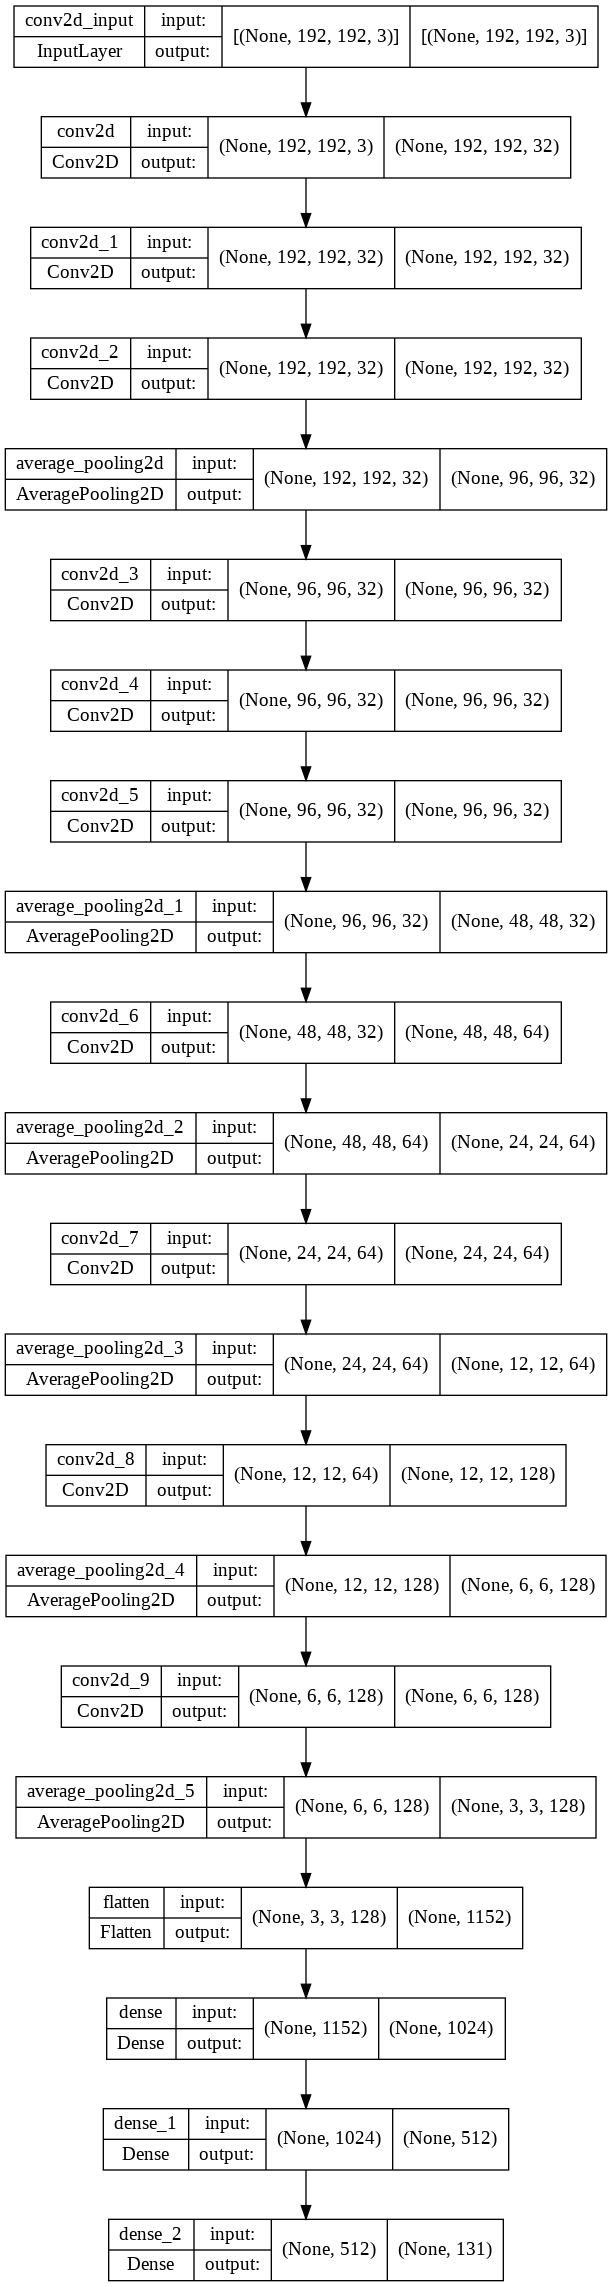

In [23]:
from keras.utils.vis_utils import plot_model
plot_model(model_CNN, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Training model (~ 45 min)

In [ ]:
model_CNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4), loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 5
history_CNN = model_CNN.fit(train_ds,epochs=epochs)

Epoch 1/5
529/529 [==============================] - 551s 1s/step - loss: 2.1880 - accuracy: 0.8354
Epoch 2/5
529/529 [==============================] - 537s 1s/step - loss: 0.0422 - accuracy: 0.9886
Epoch 3/5
529/529 [==============================] - 534s 1s/step - loss: 0.0102 - accuracy: 0.9975
Epoch 4/5
529/529 [==============================] - 534s 1s/step - loss: 0.0443 - accuracy: 0.9880
Epoch 5/5
529/529 [==============================] - 534s 1s/step - loss: 0.0131 - accuracy: 0.9967


### Evaluation of model performance on test and train (~ 7 min)

In [ ]:
results_train = model_CNN    .evaluate(train_ds, batch_size=batch_size)
results_test  = model_CNN.evaluate(val_ds,   batch_size=batch_size)
print("CNN      - train loss, train accuracy:", results_train)
print("CNN      - test loss , test acc:      ", results_test)

178/178 [==============================] - 76s 418ms/step - loss: 0.1367 - accuracy: 0.9689
CNN      - train loss, train accuracy: [0.0018226815154775977, 0.9994386434555054]
CNN      - test loss , test acc:       [0.13673284649848938, 0.9689263105392456]


# Pipeline

Here we have defined a class Pipeline which loads the final saved model from GitHub and uses it to make prediction for a single image whose path is provided by the user. Broadly, it carries out the following tasks:
* Loads pretrained model
* Loads given image and processes it
* Predicts the class of given image

In [ ]:
class Pipeline:

  def __predict_single_img_class(self, path, model_object):                  # important for the backend to function smoothly
    image_x = self.__load_image(path)
    y_pred = model_object.predict(image_x)
    y_classes_pred = y_pred.argmax(axis=-1)
    y_class_labels = np.array(sorted(self.__folders))[y_classes_pred]
    label = y_class_labels[0]
    return label

  def __display_single_img(self, image_obj):
    plt.imshow(image_obj)
    plt.title("Input Image")
    plt.show()
  
  def __load_image(self, path):                                # load image from provided path and convert it to rgb and rescale it to 1./255
    img = Image.open(path)
    self.__display_single_img(img)
    img = img.convert('RGB')
    img = img.resize(self.__image_dimensions_no_channels)
    img = np.array(img)
    img = img / 255.
    img = img[np.newaxis, :]
    return img

  def __load_model(self, git_path, model_name):
        
    # download the model save file from the github repo
    os.system(f'rm -rf my_model.zip')
    os.system(f'git clone {git_path}')
    os.system(f'mv /content/tester2/{model_name}.zip /content/')
    os.system(f'rm -rf tester2')
    os.system(f'rm -rf content')
    os.system(f'rm -rf my_model')
    os.system(f'mv /content/{model_name}.zip /content/my_model.zip')

    # loads the model from the zip file my_model.zip in the current working directory
    os.system(f'unzip /content/my_model.zip -d /content/my_model')
    self.__model = keras.models.load_model(f"my_model/content/{model_name}")
    os.system(f'rm -rf /content/my_model')                    # remove the now unnecessary folder generated by the unzipping

  def summary(self):
    return self.__model.summary()

  def __init__(self):
    self.__image_dimensions_no_channels = (96, 96)
    self.__folders = sorted(["Apple Braeburn", "Apple Crimson Snow", "Apple Golden 1", "Apple Golden 2", "Apple Golden 3", "Apple Granny Smith", "Apple Pink Lady", "Apple Red 1", "Apple Red 2", "Apple Red 3",'Apple Red Delicious','Apple Red Yellow 1','Apple Red Yellow 2','Apricot','Avocado','Avocado ripe','Banana','Banana Lady Finger','Banana Red','Beetroot','Blueberry','Cactus fruit','Cantaloupe 1','Cantaloupe 2','Carambula','Cauliflower','Cherry 1','Cherry 2','Cherry Rainier','Cherry Wax Black','Cherry Wax Red','Cherry Wax Yellow','Chestnut','Clementine','Cocos','Corn','Corn Husk','Cucumber Ripe','Cucumber Ripe 2','Dates','Eggplant','Fig','Ginger Root','Granadilla','Grape Blue','Grape Pink','Grape White','Grape White 2','Grape White 3','Grape White 4','Grapefruit Pink','Grapefruit White','Guava','Hazelnut','Huckleberry','Kaki','Kiwi','Kohlrabi','Kumquats','Lemon','Lemon Meyer','Limes','Lychee','Mandarine','Mango','Mango Red','Mangostan','Maracuja','Melon Piel de Sapo','Mulberry','Nectarine','Nectarine Flat','Nut Forest','Nut Pecan','Onion Red','Onion Red Peeled','Onion White','Orange','Papaya','Passion Fruit','Peach','Peach 2','Peach Flat','Pear','Pear 2','Pear Abate','Pear Forelle','Pear Kaiser','Pear Monster','Pear Red','Pear Stone','Pear Williams','Pepino','Pepper Green','Pepper Orange','Pepper Red','Pepper Yellow','Physalis','Physalis with Husk','Pineapple','Pineapple Mini','Pitahaya Red','Plum','Plum 2','Plum 3','Pomegranate','Pomelo Sweetie','Potato Red','Potato Red Washed','Potato Sweet','Potato White','Quince','Rambutan','Raspberry','Redcurrant','Salak','Strawberry','Strawberry Wedge','Tamarillo','Tangelo','Tomato 1','Tomato 2','Tomato 3','Tomato 4','Tomato Cherry Red','Tomato Heart','Tomato Maroon',"Tomato not Ripened","Tomato Yellow","Walnut","Watermelon"])
    self.__load_model('https://github.com/Ishaanshri95/tester2.git', 'vgg16_96x96')
  
  def predict(self, path_img):
    print('Predicted image as:', self.__predict_single_img_class(path_img, self.__model))
    return


### Demonstrating the Pipeline

In [ ]:
pipe = Pipeline() # Initialising the Pipeline
pipe.summary()  # Printing the summary of the Pipeline Model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

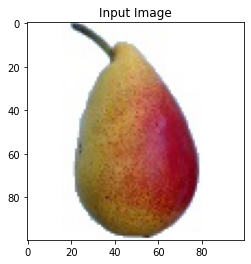

Predicted image as: Pear 2


In [ ]:
img_path = '/content/fruits360/fruits-360_dataset/fruits-360/Test/Pear 2/16_100.jpg'
pipe.predict(img_path)  # Making a prediction using the Pipeline 